In [18]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt 

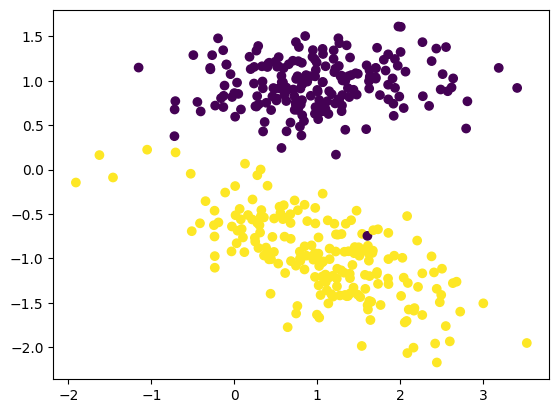

In [44]:
X, Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_classes=2, n_redundant=0, random_state=3, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [63]:
Y[Y==0] = -1

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

In [125]:
svm = SVM(C=1.0)

In [121]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0

    def hingeLoss(self, W, b, X, Y):
        loss = 0.5 * np.dot(W, W.T)
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i] * (np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1 - ti)

        return loss[0,0]
    
    def fit(self, X, Y, batch_size=100, alpha=0.001, maxIters=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        c = self.C
        w = np.zeros((1, no_of_features))
        bias = 0

        losses = []
        for i in range(maxIters):
            l = self.hingeLoss(w, bias, X, Y)
            losses.append(l)

            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            for batch_start in range(0, no_of_samples, batch_size):
                gradb = 0
                gradw = 0
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        k = ids[j]
                        ti = Y[k] * (np.dot(w, X[k].T) + bias)
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * Y[k] * X[k]
                            gradb += c * Y[k]
                
                bias += alpha * gradb
                w = w - alpha * w + alpha * gradw

        self.b = bias
        self.W = w
        return self.b, self.W[0], losses
                    
            

In [126]:
b, w, losses = svm.fit(X, Y)
print(b, w, losses[0], losses[-1]) 

0.42200000000000026 [-0.3457324  -2.09161906] 400.0 14.514029545977655


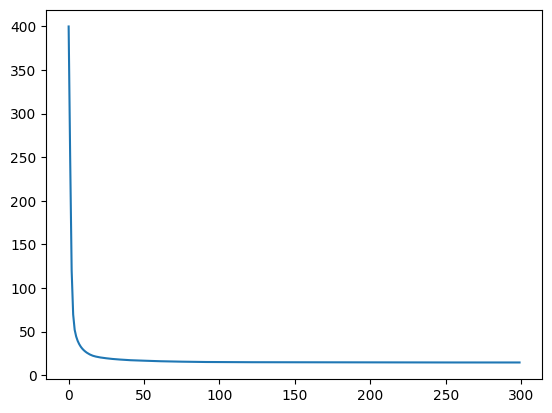

In [129]:
plt.plot(losses)
plt.show()

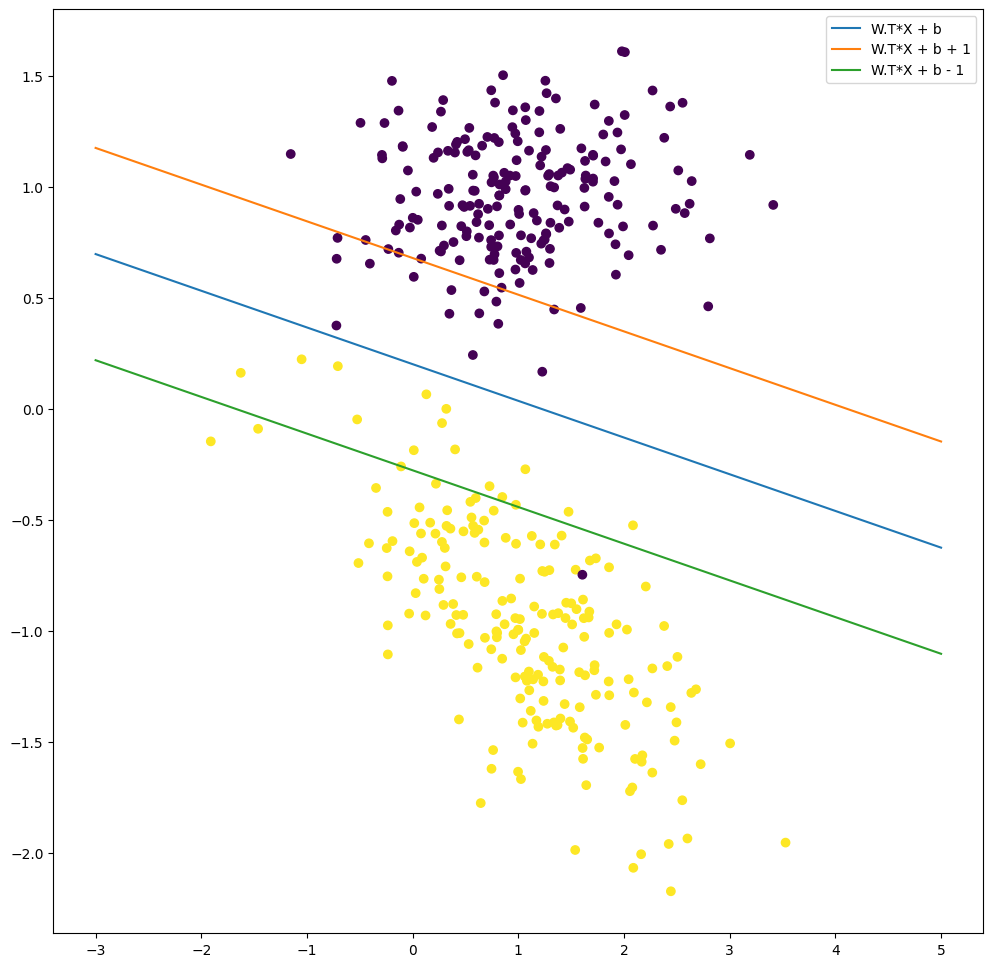

In [128]:
def plotHyperplane(w1, w2, b):
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    newX = np.linspace(-3, 5, 10)
    newY = (- w1 * newX - b) / w2  
    newY_p = (- w1 * newX - b - 1) / w2  
    newY_n = (- w1 * newX - b + 1) / w2  
    plt.plot(newX, newY, label="W.T*X + b")
    plt.plot(newX, newY_p, label="W.T*X + b + 1")
    plt.plot(newX, newY_n, label="W.T*X + b - 1")
    plt.legend()
    plt.show()

plotHyperplane(w[0], w[1], b)

6.0 [-10.11839537 -35.55715035] 400000.0 17432.010914907623


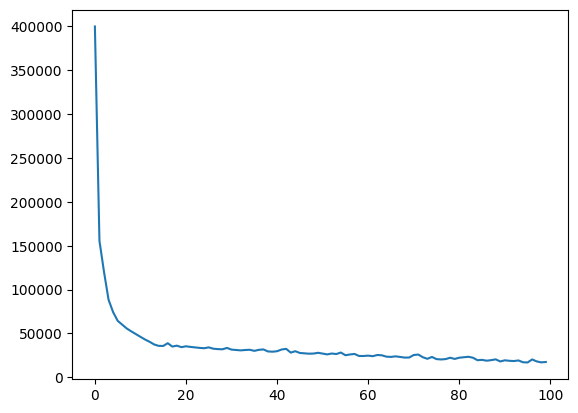

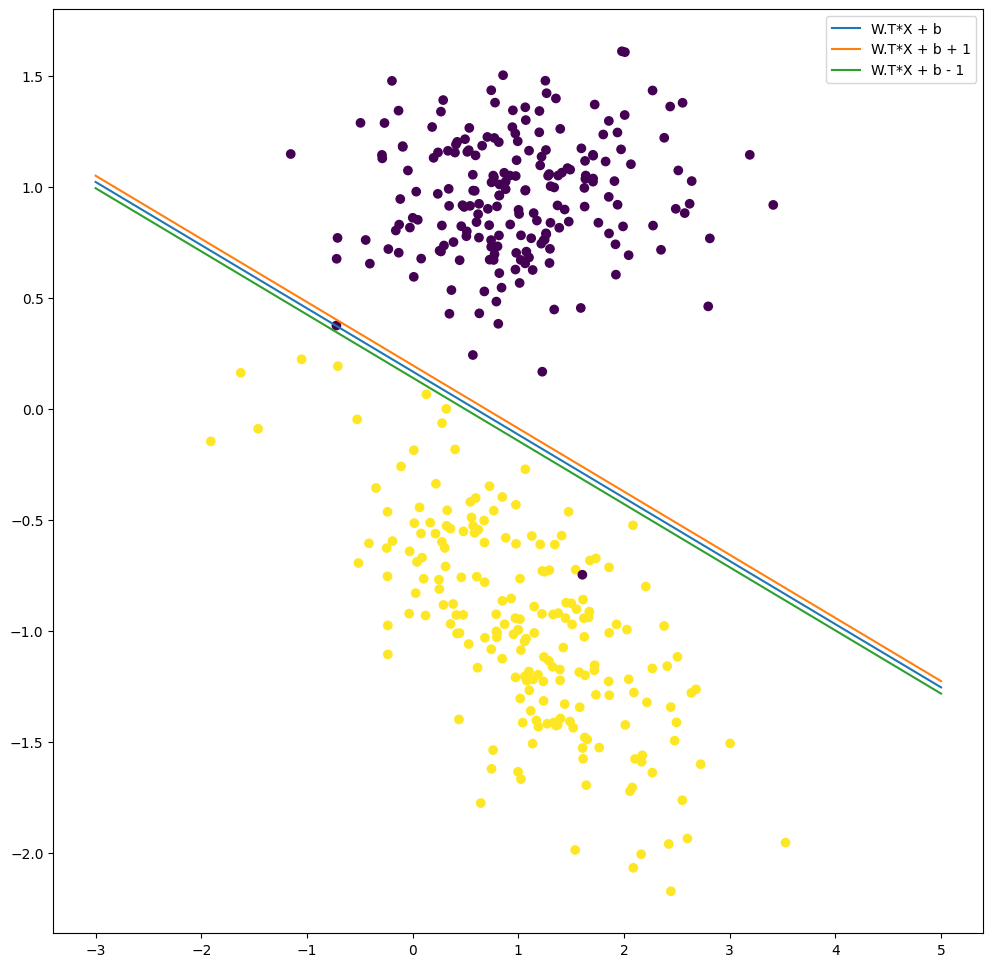

In [133]:
svm = SVM(C=1000)
b, w, losses = svm.fit(X, Y, maxIters=100)
print(b, w, losses[0], losses[-1]) 
plt.plot(losses)
plt.show()
plotHyperplane(w[0], w[1], b)